In [4]:
%pip install plotly

  Using cached plotly-5.4.0-py2.py3-none-any.whl (25.3 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import sklearn.cluster as cluster
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial import distance as sdist
from sklearn.metrics import calinski_harabasz_score
from matplotlib import pyplot as plt

In [15]:
df = pd.read_csv("noReplies-clean.csv")
df.head()
df_small = df.sample(frac=.003)

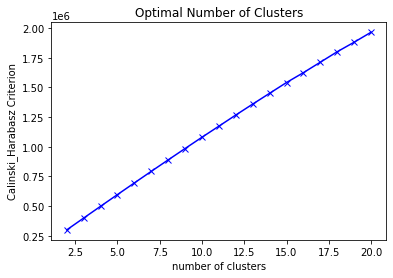

In [16]:
ch_score = []
for n in range(2, 21):
    kmeans = KMeans(n, random_state=12345).fit(df)
    ch_score.append(calinski_harabasz_score(df, labels=kmeans.labels_))

plt.plot(range(2, 21), ch_score, 'bx-')
plt.xlabel('number of clusters') 
plt.ylabel('Calinski_Harabasz Criterion') 
plt.title('Optimal Number of Clusters')
plt.show()

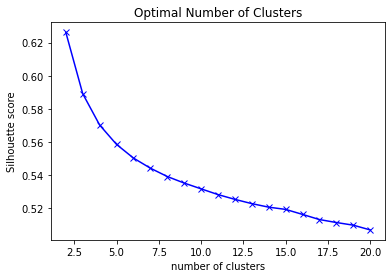

In [17]:
from sklearn.metrics import silhouette_score

si_score = []
for n in range(2, 21):
    kmeans = KMeans(n, random_state=12345).fit(df)
    si_score.append(silhouette_score(df, kmeans.labels_))

plt.plot(range(2, 21), si_score, 'bx-')
plt.xlabel('number of clusters') 
plt.ylabel('Silhouette score') 
plt.title('Optimal Number of Clusters')
plt.show()

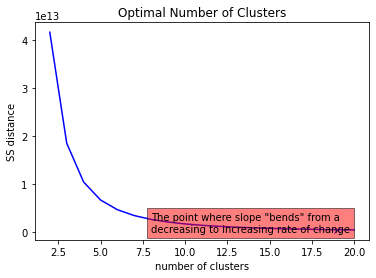

In [18]:
# WCSS: Elbow Method

ss_score = []
for n in range(2,21):
    kmeans = KMeans(n).fit(df)
    ss_score.append(kmeans.inertia_)
    
# Where does the slope bend? Find the highest (least negative) slope.
changes = []
for n in range(2, 20):
    changes.append(float(ss_score[n - 1] - ss_score[n - 2]))

optimal_n = changes.index(max(changes))

plt.plot(range(2,21), ss_score, 'bx-', markevery=[optimal_n])
plt.xlabel('number of clusters')
plt.ylabel('SS distance')
plt.title('Optimal Number of Clusters')
plt.text(8, 900, 'The point where slope "bends" from a \ndecreasing to increasing rate of change', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

In [19]:
# Train the model
kmeans = KMeans(2, random_state=12345).fit(df)

# Add assigned clusters to a new DataFrame
df_wcluster = df.copy()
df_wcluster['cluster'] = kmeans.labels_
df_wcluster.head()

Unnamed: 0  Unnamed: 0.1  created_at  num_referenced_tweets   topic_1  \
0           0             0         692                      0  0.052988   
1           1             1        1009                      0  0.624984   
2           2             2        1009                      0  0.178700   
3           3             3        1009                      0  0.062553   
4           4             4        1009                      0  0.296835   

    topic_2   topic_3   topic_4  num_hashtags_ln  num_mentions_ln  ...  \
0  0.053030  0.594013  0.299969              0.0              0.0  ...   
1  0.125005  0.125006  0.125005              0.0              0.0  ...   
2  0.246201  0.035738  0.539361              0.0              0.0  ...   
3  0.062553  0.562856  0.312038              0.0              0.0  ...   
4  0.043752  0.134403  0.525009              0.0              0.0  ...   

   source_Sprout Social  source_Twitter Web App  source_Twitter Web Client  \
0                     0                       0                          0   
1                     0                       0                          0   
2                     0                       0                          0   
3                     0                       0                          0   
4                     0                       0                          0   

   source_Twitter for iPhone  source_other  is_retweet_True  is_reply_True  \
0                          0             1                0              0   
1                          0             1                0              0   
2                          0             1                0              0   
3                          0             1                0              0   
4                          0             1                0              0   

   contains_quote_True  has_image_True  cluster  
0                    0               0        0  
1                    0               0        0  
2                    0               0        0  
3                    0               0        0  
4                    0               0        0  

[5 rows x 29 columns]

In [20]:
# Which features played the largest role in determining clusters?

output_df = pd.DataFrame({'C0_means': df_wcluster[df_wcluster.cluster == 0].mean(), 'C1_means': df_wcluster[df_wcluster.cluster == 1].mean()})
output_df['diff'] = abs(output_df['C0_means'] - output_df['C1_means'])
output_df.drop(['cluster']).sort_values(by=['diff'], ascending=False)

C0_means      C1_means          diff
Unnamed: 0                     25007.500000  75004.000000  49996.500000
Unnamed: 0.1                   25007.500000  75004.000000  49996.500000
created_at                       806.339571    664.758149    141.581423
like_count_ln                      3.093560      2.930080      0.163480
source_other                       0.181842      0.299418      0.117576
source_Sprout Social               0.213992      0.097925      0.116066
lang_other                         0.211032      0.324069      0.113037
source_Twitter Web App             0.217430      0.268043      0.050613
source_Khoros Publishing           0.067198      0.028493      0.038705
source_Twitter for iPhone          0.143254      0.104928      0.038326
num_hashtags_ln                    0.280830      0.312853      0.032023
num_referenced_tweets              0.224788      0.200932      0.023856
source_Twitter Web Client          0.107046      0.088621      0.018425
topic_1                            0.260220      0.276028      0.015808
topic_2                            0.259380      0.247035      0.012346
is_reply_True                      0.046725      0.034556      0.012169
num_mentions_ln                    0.180193      0.168180      0.012014
contains_quote_True                0.072397      0.064330      0.008067
topic_4                            0.272323      0.268192      0.004131
is_retweet_True                    0.105666      0.102047      0.003619
source_Sprinklr                    0.050204      0.047402      0.002802
has_image_True                     0.004439      0.005743      0.001304
topic_3                            0.208075      0.208740      0.000665
num_polls_ln                       0.011891      0.011401      0.000490
reply_settings_mentionedUsers      0.000420      0.000220      0.000200
possibly_sensitive_True            0.000220      0.000060      0.000160
num_cashtags_ln                    0.000046      0.000169      0.000123
reply_settings_following           0.000120      0.000060      0.000060

In [25]:
###Visualizations - change features to see different clusters
fig = px.scatter_3d(df_wcluster, x='topic_1', y='like_count_ln', z='num_hashtags_ln', color='cluster', size_max=20, opacity=1.0)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()